In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# standard library
from os.path import join, exists, abspath
import os
import sys
# external
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import wandb as wb

# local
# remove last element from path
sys.path.pop()  # kaggle titanic path messing up imports
sys.path.append(abspath(join('..')))  # ,'src'
from src.models.unet import UNet
from src.visualization.visualize import plot_many

In [3]:
path_data = '/mnt/sdb1/code/sentinel2/sample'
path_images = join(path_data, 'subscenes')
path_masks = join(path_data, 'masks')
sample_subscene = 'S2A_MSIL1C_20180101T010721_N0206_R045_T53HLD_20180101T041600.npy'

In [4]:
path_X1 = join(path_images, sample_subscene)
path_y1 = join(path_masks, sample_subscene)
X1 = np.load(path_X1).transpose(2, 0, 1)
y1 = np.load(path_y1)
print(X1.shape, y1.shape)

(13, 1022, 1022) (1022, 1022, 3)


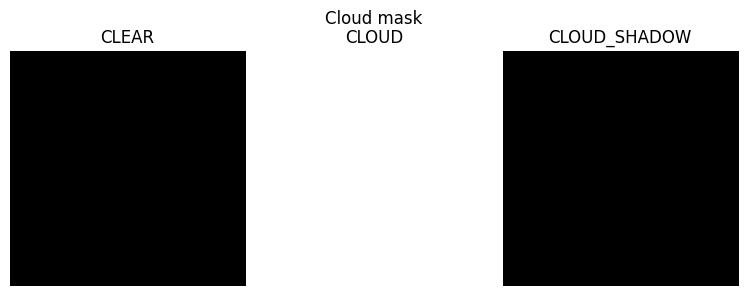

In [5]:
yy = y1.transpose(2, 0, 1).astype(np.float32)
plot_many(*yy, vmin=0, vmax=1, cmap='gray', title='Cloud mask', titles=['CLEAR', 'CLOUD', 'CLOUD_SHADOW'])

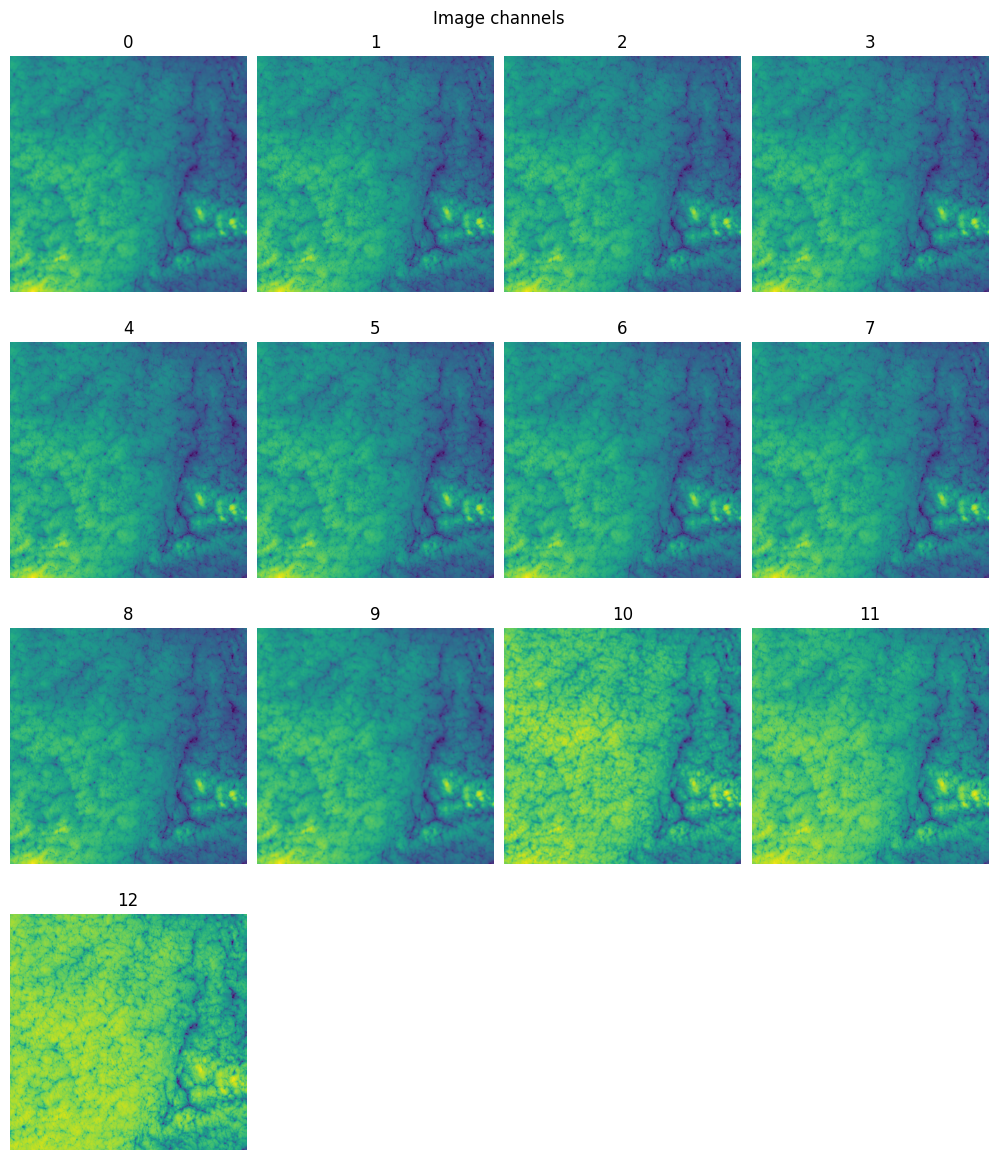

In [6]:
plot_many(*X1, title='Image channels', titles=list(range(len(X1))))

In [7]:
from src.data.dataset import CloudDataset
dataset = CloudDataset(path_data, tile_size=224)

Dataset: 4 samples
Dataset: 64 tiles


In [8]:
# Data sample shape
x, y = dataset[0]['image'], dataset[0]['label']
x.shape, y.shape

((4, 224, 224), (1, 224, 224))

In [ ]:
for s in dataset:
    print(s['image'][:, 0, 0])
    # print(s[0][0, 0, :])

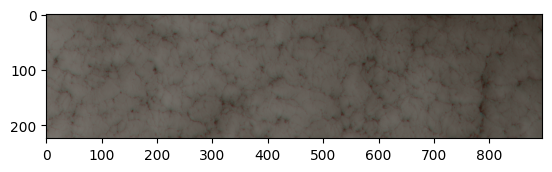

In [10]:
canvas = np.zeros((224*1, 224*4, 3))
for i in range(4):
    canvas[:, 224*i:224*(i+1)] = dataset[i]['image'][:3].transpose(1, 2, 0)    
plt.imshow(canvas)
plt.show()

In [11]:
# Average cloudiness
ys = np.array(dataset.masks)
ys.mean(axis=(0, 2, 3))

array([0.77824277], dtype=float32)

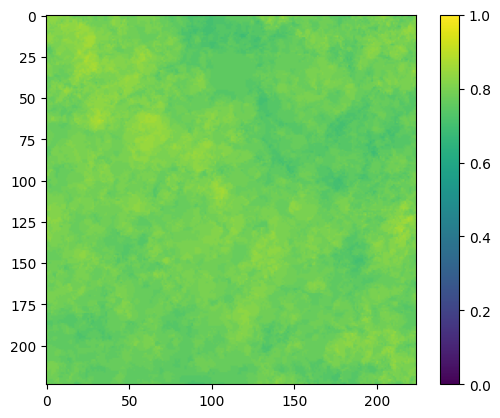

In [12]:
# Are there visual patterns?
plt.imshow(ys.mean(axis=(0, 1)), vmin=0, vmax=1)
# plot colorbar with scale 0 to 1
plt.colorbar()

In [15]:
# model = UNet(4, 1)
# p = model(s['image'])  # test prediction
# p.shape, p.type(), p

(torch.Size([1, 1, 224, 224]),
 'torch.FloatTensor',
 tensor([[[[-0.5726,  1.0668,  1.3003,  ...,  2.5542,  3.1411,  0.1116],
           [-0.9701,  1.2631,  0.8963,  ...,  1.0847,  0.4649, -0.4948],
           [-0.3165,  1.4107,  0.5245,  ...,  1.4068, -0.7488, -1.2343],
           ...,
           [-0.9706,  0.3842,  0.3674,  ...,  1.4317, -0.3156, -0.3676],
           [-0.7302,  0.2676,  0.7103,  ...,  0.8141, -1.7082, -0.9961],
           [-1.1735, -0.1751,  0.8723,  ...,  1.6414, -1.7214, -1.2766]]]],
        grad_fn=<ConvolutionBackward0>))

In [ ]:
# TODO show tiling